# Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

In this blog, we will analyze the Census Dataset from the UCI Machine Learning Repository.We will use Logistic Regression to build the classifier.
Its provides the information on the Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,
Capital_loss,Hours_per_week,Native_country and Income.we are asked to predict whether Income in US falls in the income category of either greater
than 50K Dollars or less equal to 50K Dollars

# Census Income

The Census Bureau reports income from several major household surveys and programs.
Each differs from the others in some way, such as the length and detail of its questionnaire, the number of households included (sample size), and the methodology used.
Census money income is defined as income received on a regular basis (exclusive of certain money receipts such as capital gains)
before payments for personal income taxes, social security, union dues, medicare deductions, etc. Therefore, money income
does not reflect the fact that some families receive part of their income in the form of noncash benefits, such as food stamps, health benefits, subsidized housing,
and goods produced and consumed on the farm. In addition, money income does not reflect the fact that noncash benefits are also received by some nonfarm residents which may take 
the form of the use of business transportation and facilities, full or partial payments by business for retirement programs, medical and educational expenses, etc.

# Importing the Libraries

In [136]:
# data processing
import pandas as pd

# linear algebra
import numpy as np

# matplotlib inline
import matplotlib.pyplot as plt

# data visualisation
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Algorithms
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier

# Getting the Data

In [81]:
df=pd.read_csv("Census Income.csv")

In [82]:
df

Age          Workclass  Fnlwgt    Education  Education_num  \
0       50   Self-emp-not-inc   83311    Bachelors             13   
1       38            Private  215646      HS-grad              9   
2       53            Private  234721         11th              7   
3       28            Private  338409    Bachelors             13   
4       37            Private  284582      Masters             14   
...    ...                ...     ...          ...            ...   
32555   27            Private  257302   Assoc-acdm             12   
32556   40            Private  154374      HS-grad              9   
32557   58            Private  151910      HS-grad              9   
32558   22            Private  201490      HS-grad              9   
32559   52       Self-emp-inc  287927      HS-grad              9   

            Marital_status          Occupation    Relationship    Race  \
0       Married-civ-spouse     Exec-managerial         Husband   White   
1                 Divorced   Handlers-cleaners   Not-in-family   White   
2       Married-civ-spouse   Handlers-cleaners         Husband   Black   
3       Married-civ-spouse      Prof-specialty            Wife   Black   
4       Married-civ-spouse     Exec-managerial            Wife   White   
...                    ...                 ...             ...     ...   
32555   Married-civ-spouse        Tech-support            Wife   White   
32556   Married-civ-spouse   Machine-op-inspct         Husband   White   
32557              Widowed        Adm-clerical       Unmarried   White   
32558        Never-married        Adm-clerical       Own-child   White   
32559   Married-civ-spouse     Exec-managerial            Wife   White   

           Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country  \
0         Male             0             0              13   United-States   
1         Male             0             0              40   United-States   
2         Male             0             0              40   United-States   
3       Female             0             0              40            Cuba   
4       Female             0             0              40   United-States   
...        ...           ...           ...             ...             ...   
32555   Female             0             0              38   United-States   
32556     Male             0             0              40   United-States   
32557   Female             0             0              40   United-States   
32558     Male             0             0              20   United-States   
32559   Female         15024             0              40   United-States   

       Income  
0       <=50K  
1       <=50K  
2       <=50K  
3       <=50K  
4       <=50K  
...       ...  
32555   <=50K  
32556    >50K  
32557   <=50K  
32558   <=50K  
32559    >50K  

[32560 rows x 15 columns]

# Data Exploration/Analysis

In [83]:
df.shape

(32560, 15)

In census income dataset we have 32560 rows and 15 columns.

In [84]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

In census income dataset we have  int types and object types of values which are independent variable and the Income is our target variable in this dataset.

In [85]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In census income dataset we have 14 features and 1 target variable.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


There are 32561 samples in these dataset.
There are both categorical and numerical columns in the dataset.
There are no null values in this dataset.

In [87]:
# More information about the data can be gathered by using
df.describe()

Age        Fnlwgt  Education_num  Capital_gain  Capital_loss  \
count  32560.000000  3.256000e+04   32560.000000  32560.000000  32560.000000   
mean      38.581634  1.897818e+05      10.080590   1077.615172     87.306511   
std       13.640642  1.055498e+05       2.572709   7385.402999    402.966116   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178315e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783630e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370545e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  99999.000000   4356.000000   

       Hours_per_week  
count    32560.000000  
mean        40.437469  
std         12.347618  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000

There are 32560 samples in this dataset There are both categorical and numerical columns in the dataset. fnlwgt appears to be a highly dispersive.
In fact, it is a weight on the Current Population Survey (CPS) files. 
We will not incorporate fnlwgt in set of predictor variables.
Target variable is not see in describe function and other  some variables are not see in this table.
Variables that do not appear in this table are object type. They have to be converted to int type.

In [88]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In census income dataset has no missing values.

In [89]:
df["Income"].unique()

array([' <=50K', ' >50K'], dtype=object)

In this dataset we have Income in US falls in the income category of either greater than 50K Dollars or less equal to 50K Dollars.

In [90]:
df["Income"].value_counts()

 <=50K    24719
 >50K      7841
Name: Income, dtype: int64

In this dataset we have <=50k column has most values as compared to >50k column. <=50k column has 24719 values. >50k column has 7841 values.

# Label encoder

Label Encoding is a popular encoding technique for handling categorical variables. In this technique, each label is assigned a unique integer based on alphabetical ordering. Let's see how to implement label encoding in Python using the scikit-learn library and also understand the challenges with label encoding.

In [91]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [92]:
df["Income"]=LE.fit_transform(df["Income"])
df["Income"].unique()

array([0, 1])

In [93]:
df["Workclass"]=LE.fit_transform(df["Workclass"])
df["Workclass"].unique()

array([6, 4, 7, 1, 2, 0, 5, 8, 3])

In [94]:
df["Education"]=LE.fit_transform(df["Education"])
df["Education"].unique()

array([ 9, 11,  1, 12,  6, 15,  7,  8,  5, 10, 14,  4,  0,  3, 13,  2])

In [95]:
df["Marital_status"]=LE.fit_transform(df["Marital_status"])
df["Marital_status"].unique()

array([2, 0, 3, 4, 5, 1, 6])

In [96]:
df["Occupation"]=LE.fit_transform(df["Occupation"])
df["Occupation"].unique()

array([ 4,  6, 10,  8,  1, 12,  3, 14,  5,  7, 13,  0, 11,  2,  9])

In [97]:
df["Relationship"]=LE.fit_transform(df["Relationship"])
df["Relationship"].unique()

array([0, 1, 5, 3, 4, 2])

In [98]:
df["Race"]=LE.fit_transform(df["Race"])
df["Race"].unique()

array([4, 2, 1, 0, 3])

In [99]:
df["Sex"]=LE.fit_transform(df["Sex"])
df["Sex"].unique()

array([1, 0])

In [100]:
df["Native_country"]=LE.fit_transform(df["Native_country"])
df["Native_country"].unique()

array([39,  5, 23, 19,  0, 26, 35, 33, 16,  9,  2, 11, 20, 30, 22, 31,  4,
        1, 37,  7, 25, 36, 14, 32,  6,  8, 10, 13,  3, 24, 41, 29, 28, 34,
       38, 12, 27, 40, 17, 21, 18, 15])

There are 9 columns is object types variable . Using Label encoder these 9 column is converting into int type.

# EDA

will use countplot from the seaborn package.

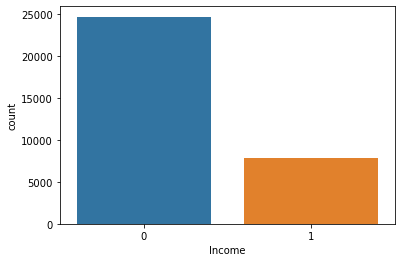

In [101]:
sns.countplot(df["Income"]);

In census income Target class is imbalance.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Marital_status'}>,
        <AxesSubplot:title={'center':'Occupation'}>,
        <AxesSubplot:title={'center':'Relationship'}>],
       [<AxesSubplot:title={'center':'Race'}>,
        <AxesSubplot:title={'center':'Sex'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>,
        <AxesSubplot:title={'center':'Native_country'}>,
        <AxesSubplot:title={'center':'Income'}>, <AxesSubplot:>]],
      dtype=object)

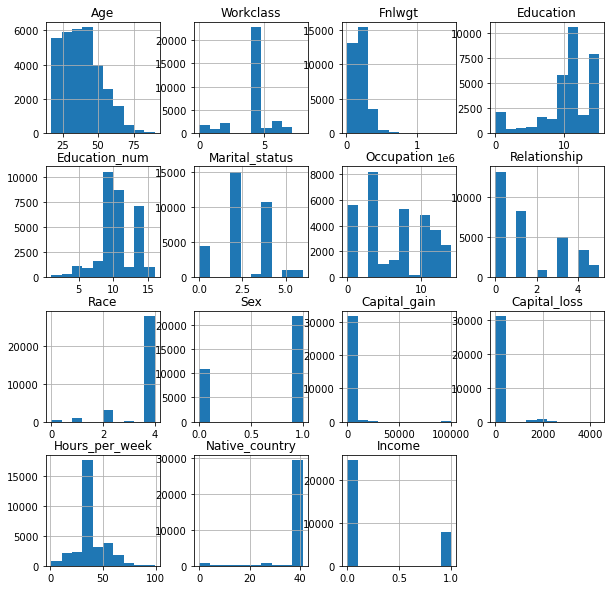

In [102]:
df.hist(figsize=(10,10))

None of the df dataset have missing values.
The values are on different scales. Many machine learning models require the values to be on the same scale. 
We will use StandardScaler from the sklearn library to scale the features.

<AxesSubplot:xlabel='count', ylabel='Workclass'>

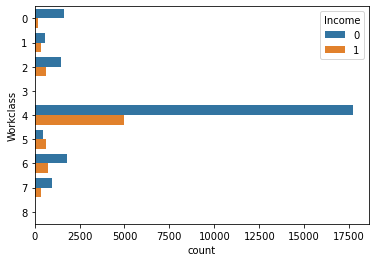

In [103]:
sns.countplot(y='Workclass', hue='Income', data = df)

<AxesSubplot:xlabel='count', ylabel='Occupation'>

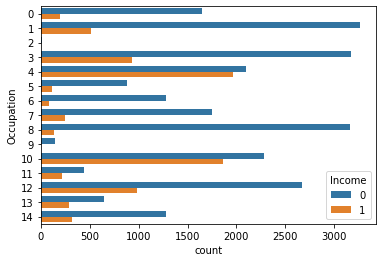

In [104]:
sns.countplot(y='Occupation', hue='Income', data = df)

In census Income has no missing values.In first plot is showing is workclass of the dataset and second plot is showing Occupation of the dataset.

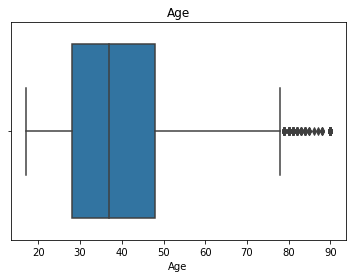

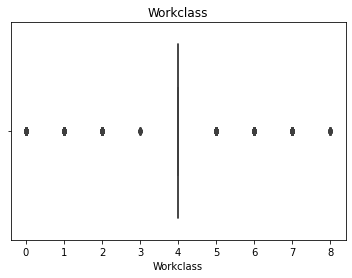

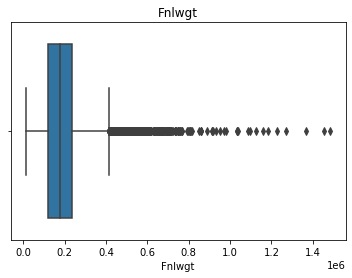

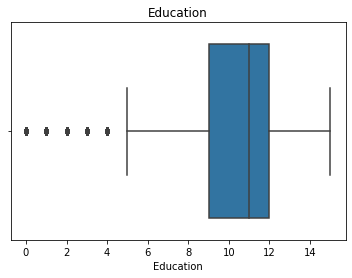

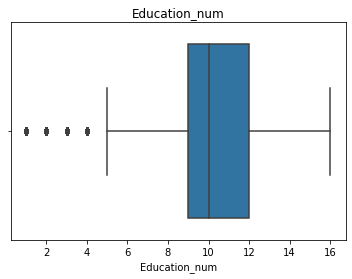

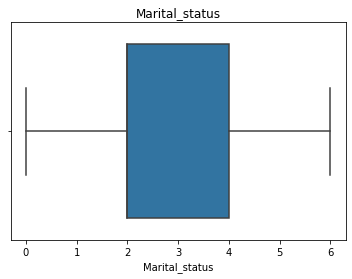

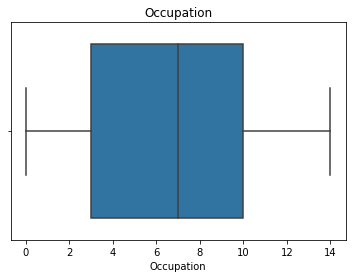

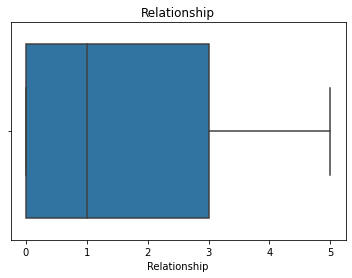

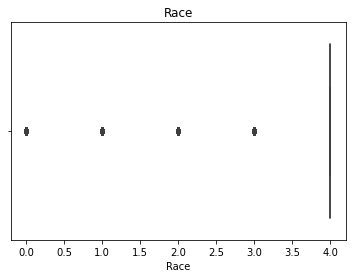

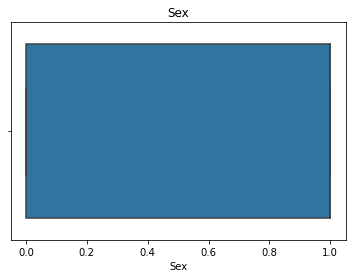

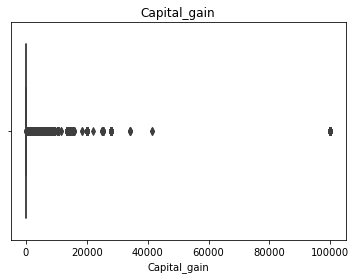

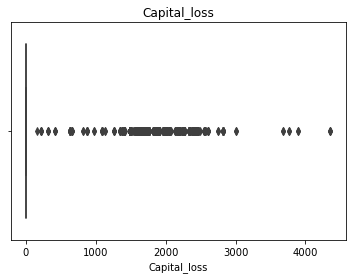

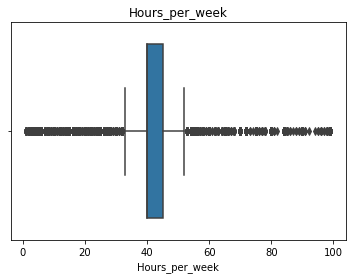

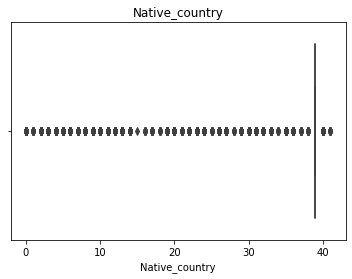

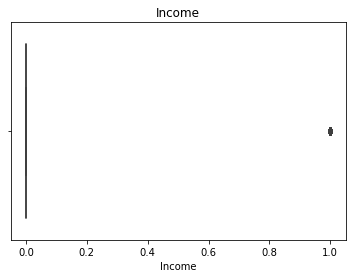

In [105]:
for col in ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']:
    sns.boxplot(df[col].dropna(),orient='v')
    plt.title(col)
    plt.show()

A box and whisker plot is a way of summarizing a set of data measured on an interval scale. It is often used in explanatory data analysis. 
This type of graph is used to show the shape of the distribution, its central value, and its variability.
In census Income dataset, Age, Workclass,Fnlwgt,Education,Education_num,Race,Capital_gain,Capital_loss,Hours_per_week,Native_country,
Income these columns has outliers are present and Marital_status,Occupation,Relationship,Sex these column has no outliers are present.

# Distribution plot (Dist plot)

distplot() function is used to plot the distplot. The distplot represents the univariate distribution of data i.e.
data distribution of a variable against the density distribution. 
The seaborn distplot() function accepts the data variable as an argument and returns the plot with the density distribution.

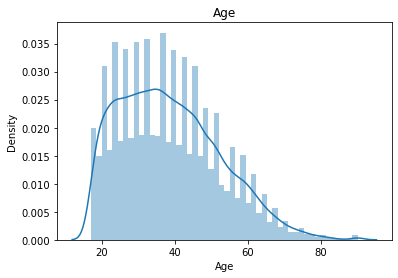

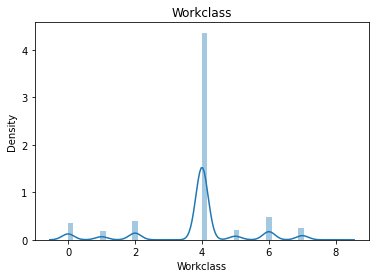

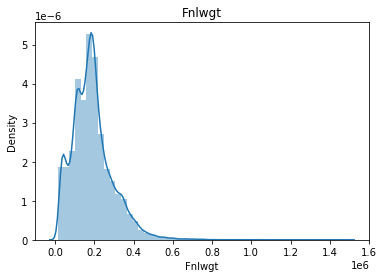

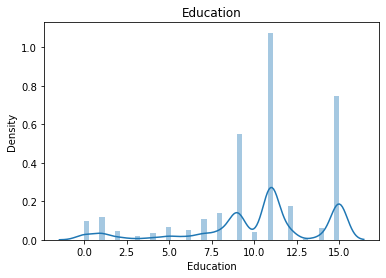

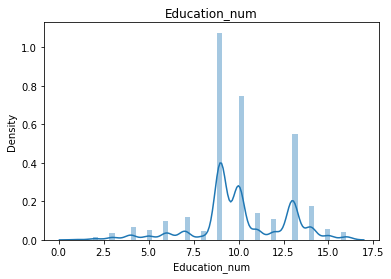

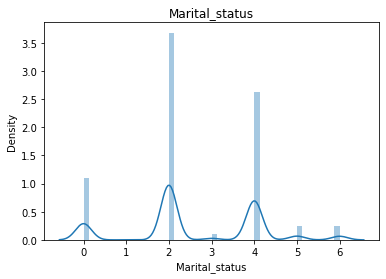

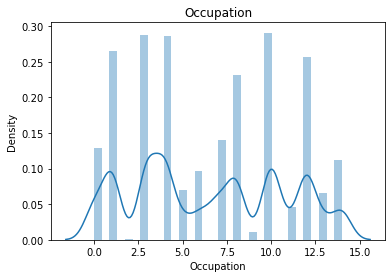

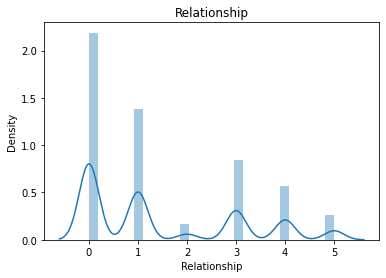

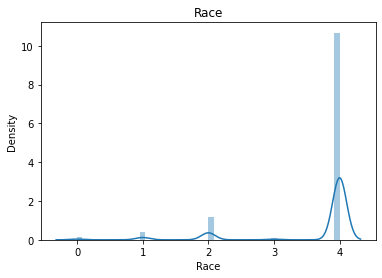

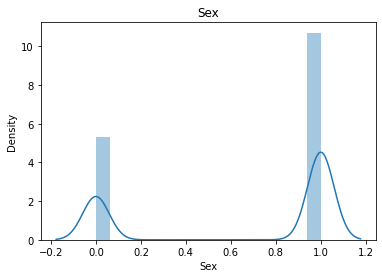

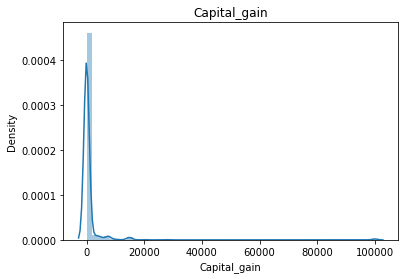

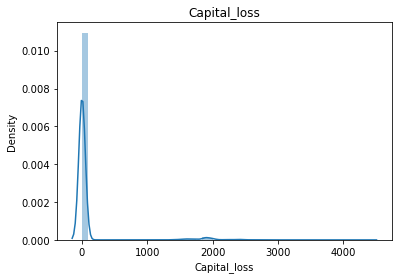

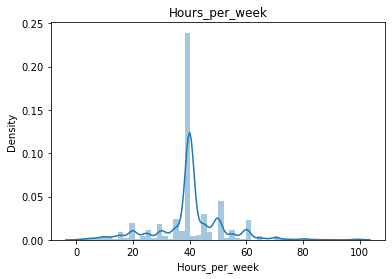

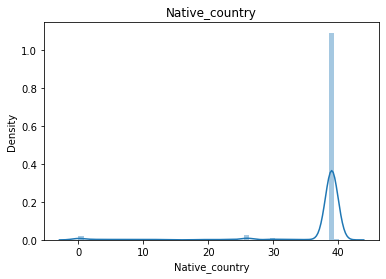

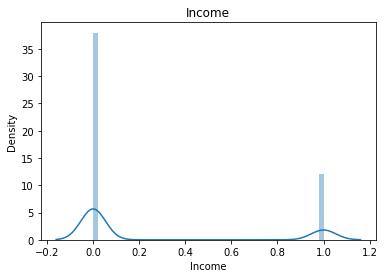

In [62]:
for col in ['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income']:
    sns.distplot(df[col].dropna())
    plt.title(col)
    plt.show()

In census Income dataset Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Captital_loss,
Hours_per_week,Native_country,Income these column has  Data is not normally distributed and Capital_gain these column has Data is normally distributed.

# Bar plot

Bar graph (bar chart) is a graph that represents the categorical data using rectangular bars.
The bar graph shows the comparison between discrete categories.
The bar graph is used to compare the items between different groups over time. Bar graphs are used to measure the changes over a period of time.
When the changes are larger, a bar graph is the best option to represent the data.

<AxesSubplot:xlabel='Age', ylabel='Income'>

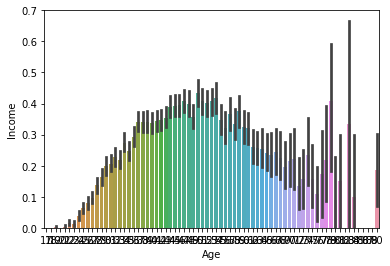

In [64]:
sns.barplot(x='Age', y='Income', data=df)

In this given plot  last column has most income showing.

<AxesSubplot:xlabel='Workclass', ylabel='Income'>

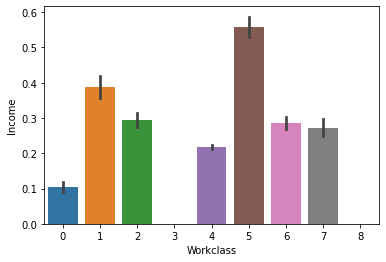

In [65]:
sns.barplot(x='Workclass', y='Income', data=df)

In census income dataset, in given plot 5 column has most income showing. The lowest income is shown in 0 column.

<AxesSubplot:xlabel='Education', ylabel='Income'>

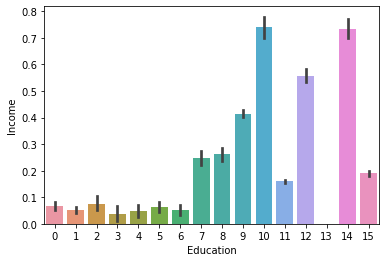

In [67]:
sns.barplot(x='Education', y='Income', data=df)

In Census Income dataset, in given plot 14 column has most Income showing.The lowest Income is shown on 3 column.

<AxesSubplot:xlabel='Marital_status', ylabel='Income'>

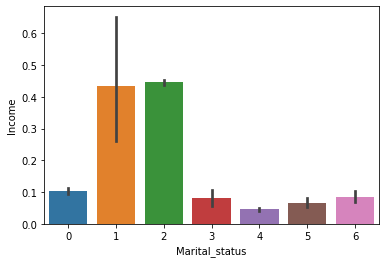

In [68]:
sns.barplot(x='Marital_status', y='Income', data=df)

In given plot 2 column has most income showing.The lowest Income is shown on 4 column.

<AxesSubplot:xlabel='Occupation', ylabel='Income'>

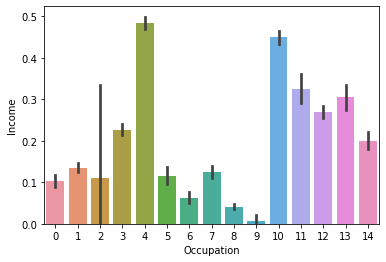

In [69]:
sns.barplot(x='Occupation', y='Income', data=df)

In given plot 4 column has most Income showing.The lowest Income is shown on 9 column.

<AxesSubplot:xlabel='Relationship', ylabel='Income'>

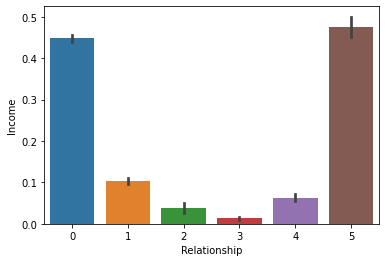

In [70]:
sns.barplot(x='Relationship', y='Income', data=df)

In given plot 1 column has most Income showing.The lowest Income is shown on 3 column.

<AxesSubplot:xlabel='Sex', ylabel='Income'>

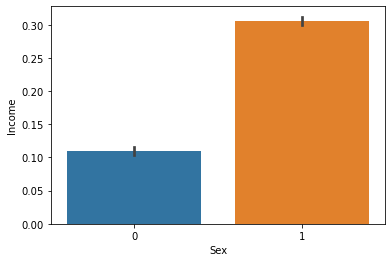

In [71]:
sns.barplot(x='Sex', y='Income', data=df)

In given plot 1 column has most Income showing and 0 column has less Income showing.

# Bivariate analysis

Comparing multiple variables simultaneously is also another useful way to understand your data. When you have two continuous variables, a scatter plot is usually used.
You can use a boxplot to compare one continuous and one categorical variable.

Scatter plots primary uses are to observe and show relationships between two numeric variables.
The dots in a scatter plot not only report the values of individual data points, but also patterns when the data are taken as a whole.
A scatter plot can also be useful for identifying other patterns in data.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


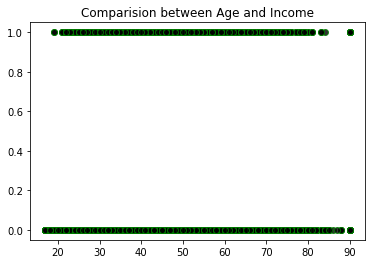

In [72]:
plt.scatter(df["Age"],df["Income"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between Age and Income")
plt.show()

In these column has outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


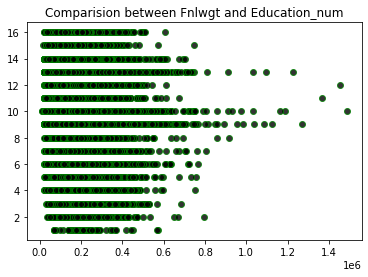

In [73]:
plt.scatter(df["Fnlwgt"],df["Education_num"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between Fnlwgt and Education_num")
plt.show()

In this plot has outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


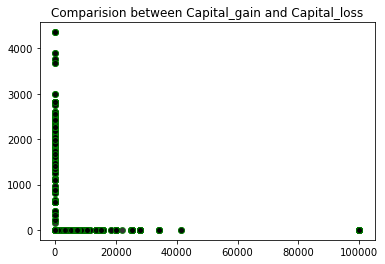

In [74]:
plt.scatter(df["Capital_gain"],df["Capital_loss"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between Capital_gain and Capital_loss")
plt.show()

In this plot has outliers are present.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


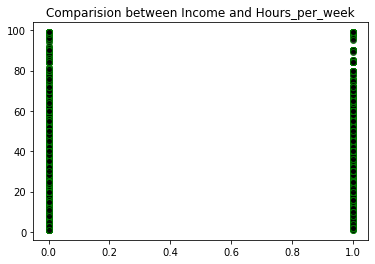

In [75]:
plt.scatter(df["Income"],df["Hours_per_week"],alpha=0.8,c=(0,0,0),edgecolors='g')
plt.title("Comparision between Income and Hours_per_week")
plt.show()

In this plot has outliers are present.

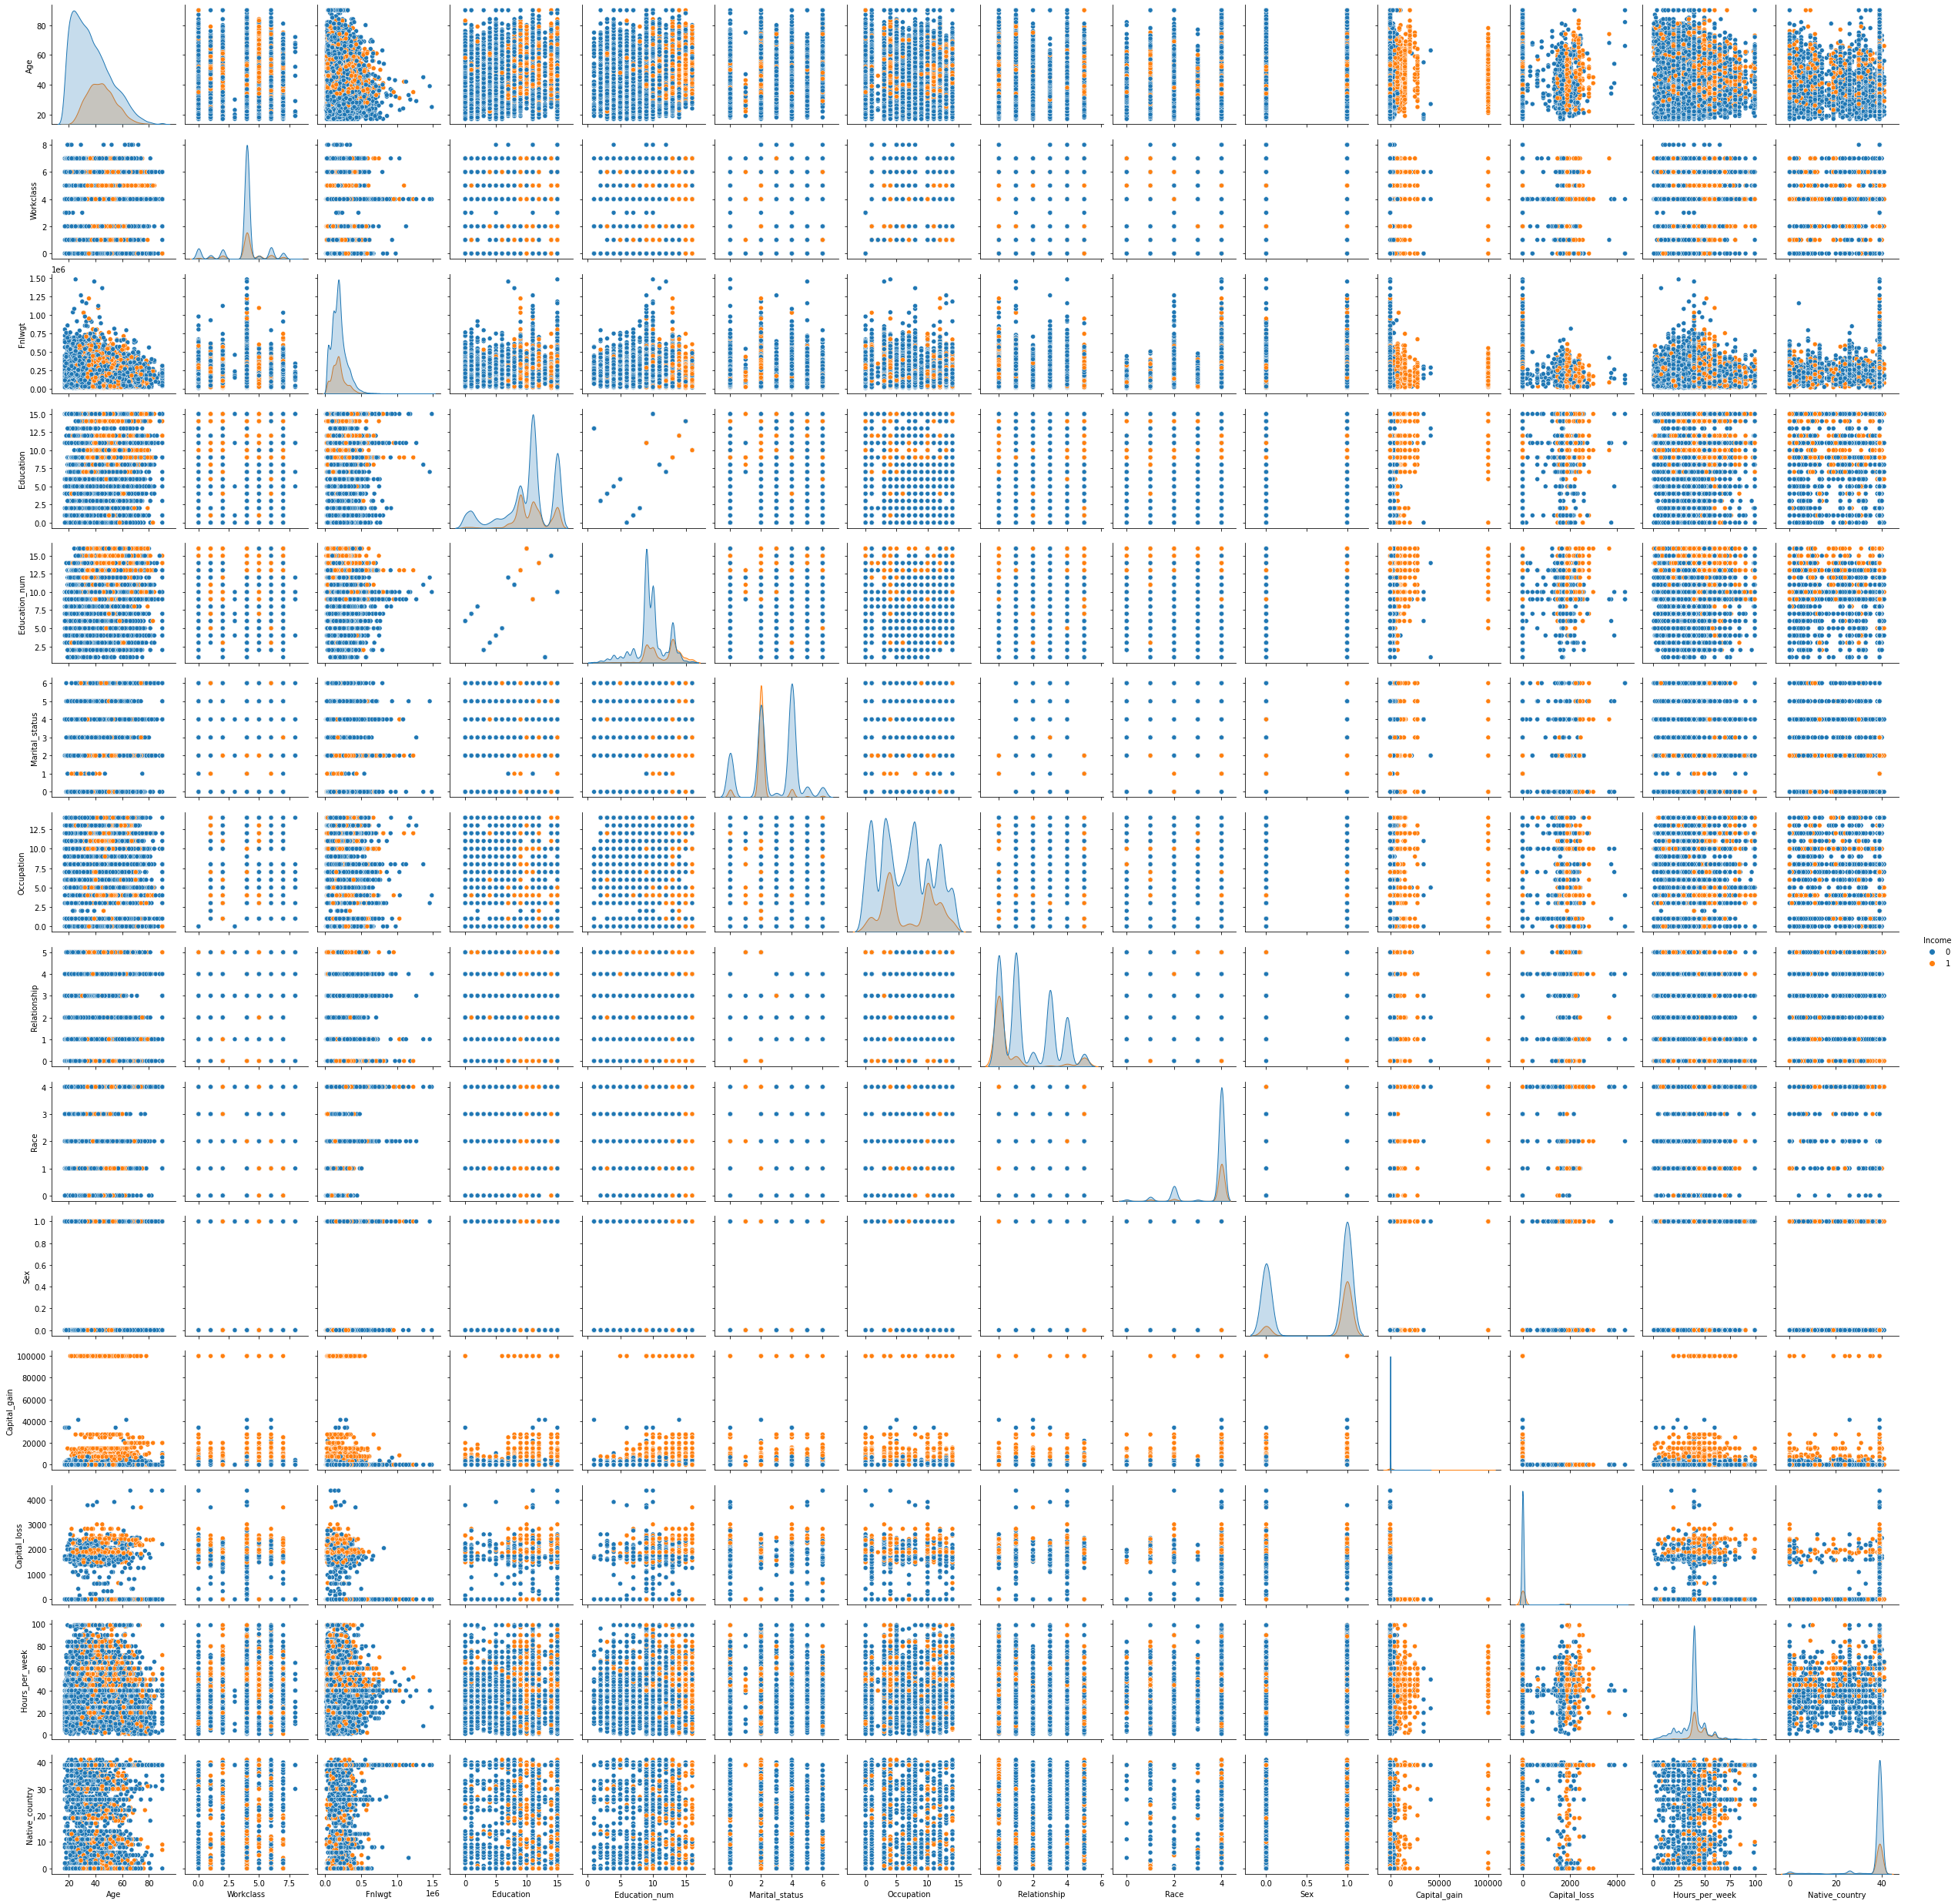

In [76]:
sns.pairplot(df,hue="Income")

We can check the corelation between dependent and independent features using dataframe.corr() function. This plot pairwise relationships in a dataset.
Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters. 
It also helps to form some simple classification models by drawing some simple lines or make linear separation in our data-set.

# Checking Correlation

In [106]:
cor=df.corr()
cor

Age  Workclass    Fnlwgt  Education  Education_num  \
Age             1.000000   0.003786 -0.076646  -0.010508       0.036527   
Workclass       0.003786   1.000000 -0.016587   0.023537       0.052015   
Fnlwgt         -0.076646  -0.016587  1.000000  -0.028156      -0.043159   
Education      -0.010508   0.023537 -0.028156   1.000000       0.359172   
Education_num   0.036527   0.052015 -0.043159   0.359172       1.000000   
Marital_status -0.266292  -0.064798  0.028184  -0.038398      -0.069338   
Occupation     -0.020946   0.255004  0.001554  -0.021274       0.109748   
Relationship   -0.263698  -0.090449  0.008922  -0.010879      -0.094145   
Race            0.028718   0.049720 -0.021278   0.014135       0.031825   
Sex             0.088832   0.095942  0.026882  -0.027349       0.012256   
Capital_gain    0.077674   0.033828  0.000437   0.030047       0.122627   
Capital_loss    0.057775   0.012231 -0.010259   0.016744       0.079932   
Hours_per_week  0.068756   0.138974 -0.018770   0.055510       0.148127   
Native_country -0.001151  -0.007710 -0.051957   0.064291       0.050831   
Income          0.234039   0.051645 -0.009481   0.079311       0.335182   

                Marital_status  Occupation  Relationship      Race       Sex  \
Age                  -0.266292   -0.020946     -0.263698  0.028718  0.088832   
Workclass            -0.064798    0.255004     -0.090449  0.049720  0.095942   
Fnlwgt                0.028184    0.001554      0.008922 -0.021278  0.026882   
Education            -0.038398   -0.021274     -0.010879  0.014135 -0.027349   
Education_num        -0.069338    0.109748     -0.094145  0.031825  0.012256   
Marital_status        1.000000   -0.009617      0.185461 -0.068025 -0.129337   
Occupation           -0.009617    1.000000     -0.075620  0.006779  0.080328   
Relationship          0.185461   -0.075620      1.000000 -0.116052 -0.582453   
Race                 -0.068025    0.006779     -0.116052  1.000000  0.087197   
Sex                  -0.129337    0.080328     -0.582453  0.087197  1.000000   
Capital_gain         -0.043398    0.025511     -0.057918  0.011143  0.048477   
Capital_loss         -0.034182    0.017979     -0.061064  0.018902  0.045572   
Hours_per_week       -0.190521    0.080384     -0.248975  0.041910  0.229312   
Native_country       -0.023827   -0.012532     -0.005504  0.137849 -0.008125   
Income               -0.199295    0.075448     -0.250924  0.071853  0.215995   

                Capital_gain  Capital_loss  Hours_per_week  Native_country  \
Age                 0.077674      0.057775        0.068756       -0.001151   
Workclass           0.033828      0.012231        0.138974       -0.007710   
Fnlwgt              0.000437     -0.010259       -0.018770       -0.051957   
Education           0.030047      0.016744        0.055510        0.064291   
Education_num       0.122627      0.079932        0.148127        0.050831   
Marital_status     -0.043398     -0.034182       -0.190521       -0.023827   
Occupation          0.025511      0.017979        0.080384       -0.012532   
Relationship       -0.057918     -0.061064       -0.248975       -0.005504   
Race                0.011143      0.018902        0.041910        0.137849   
Sex                 0.048477      0.045572        0.229312       -0.008125   
Capital_gain        1.000000     -0.031614        0.078409       -0.001984   
Capital_loss       -0.031614      1.000000        0.054256        0.000420   
Hours_per_week      0.078409      0.054256        1.000000       -0.002671   
Native_country     -0.001984      0.000420       -0.002671        1.000000   
Income              0.223333      0.150523        0.229690        0.015845   

                  Income  
Age             0.234039  
Workclass       0.051645  
Fnlwgt         -0.009481  
Education       0.079311  
Education_num   0.335182  
Marital_status -0.199295  
Occupation      0.075448  
Relationship   -0.250924  
Race            0.071853  
Sex             0.21

This column is checking correlation between different different columns.

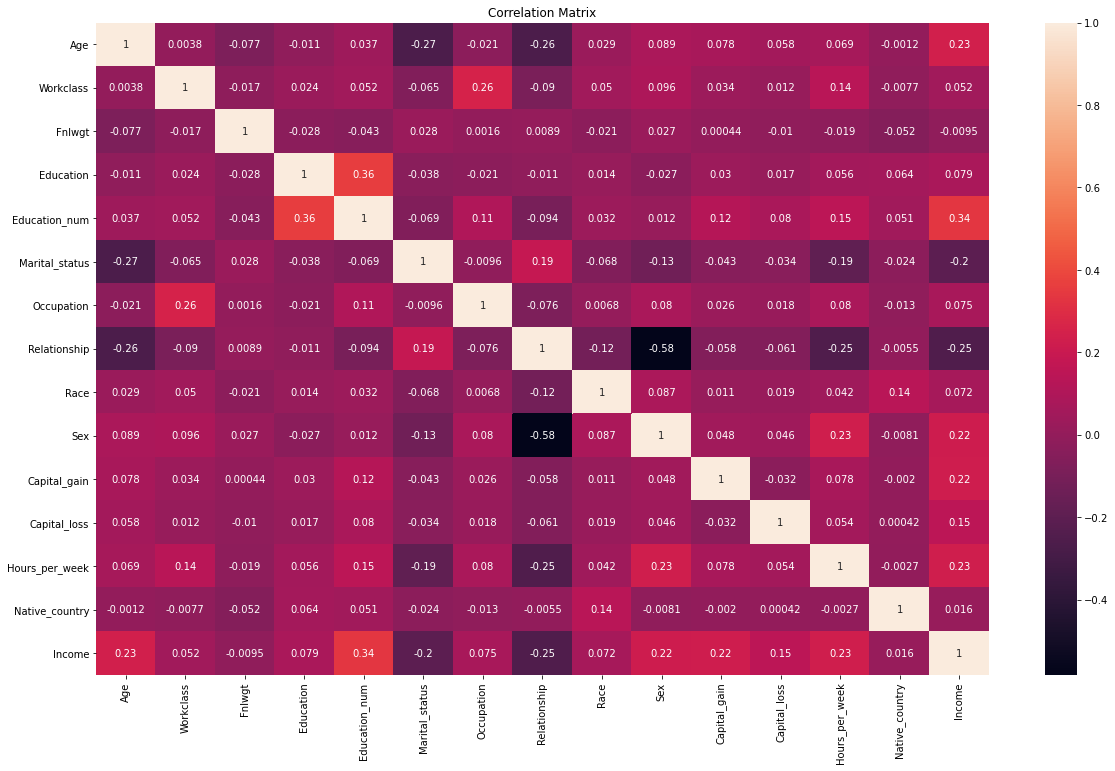

In [107]:
plt.figure(figsize=[20,12])
sns.heatmap(cor,annot=True)
plt.title("Correlation Matrix")
plt.show()

I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph. Dark shades are very bad correlation between columns.if there is any relationship amongst the numerical variables and the response, income, 
is to create a correlation plot. However, the response is a factor variable with levels 1 and 2 and is unable to be directly added to the correlation plot. Therefore, I made the income variable into a binary variable with levels 0 and 1 to overcome this problem.
We can see that the numerical variables do not seem to be strongly correlated with each other. However, we see the final weight variable does not appear to have an association with the response either.

Light shades are bad correlation between the columns.

# Correlation Metrix

Correlation Matrix is basically a covariance matrix. Also known as the auto-covariance matrix, dispersion matrix, variance matrix, or variance-covariance matrix. It is a matrix in which i-j position defines the correlation between the ith and jth parameter of the given data-set.

When the data points follow a roughly straight-line trend, the variables are said to have an approximately linear relationship.
In some cases, the data points fall close to a straight line, but more often there is quite a bit of variability of the points around the straight-line trend

In [108]:
corr_matrix=df.corr()
corr_matrix["Income"].sort_values(ascending=False)

Income            1.000000
Education_num     0.335182
Age               0.234039
Hours_per_week    0.229690
Capital_gain      0.223333
Sex               0.215995
Capital_loss      0.150523
Education         0.079311
Occupation        0.075448
Race              0.071853
Workclass         0.051645
Native_country    0.015845
Fnlwgt           -0.009481
Marital_status   -0.199295
Relationship     -0.250924
Name: Income, dtype: float64

I am finding the correlation value of each column. Their are identify the corrlation of independent variable with target variable "Income".

# Outlier Removal

Sometimes a dataset can contain extreme values that are outside the range of what is expected and unlike the other data. These are called outliers and often machine learning modeling and model skill in general can be improved by understanding and even removing these outlier values.

In [109]:
from scipy.stats import zscore
z=np.abs(zscore(df))

new_df=df[(z<5).all(axis=1)]

In [110]:
new_df

Age  Workclass  Fnlwgt  Education  Education_num  Marital_status  \
0       50          6   83311          9             13               2   
1       38          4  215646         11              9               0   
2       53          4  234721          1              7               2   
3       28          4  338409          9             13               2   
4       37          4  284582         12             14               2   
...    ...        ...     ...        ...            ...             ...   
32555   27          4  257302          7             12               2   
32556   40          4  154374         11              9               2   
32557   58          4  151910         11              9               6   
32558   22          4  201490         11              9               4   
32559   52          5  287927         11              9               2   

       Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  \
0               4             0     4    1             0             0   
1               6             1     4    1             0             0   
2               6             0     2    1             0             0   
3              10             5     2    0             0             0   
4               4             5     4    0             0             0   
...           ...           ...   ...  ...           ...           ...   
32555          13             5     4    0             0             0   
32556           7             0     4    1             0             0   
32557           1             4     4    0             0             0   
32558           1             3     4    1             0             0   
32559           4             5     4    0         15024             0   

       Hours_per_week  Native_country  Income  
0                  13              39       0  
1                  40              39       0  
2                  40              39       0  
3                  40               5       0  
4                  40              39       0  
...               ...             ...     ...  
32555              38              39       0  
32556              40              39       1  
32557              40              39       0  
32558              20              39       0  
32559              40              39       1  

[32103 rows x 15 columns]

In [111]:
new_df.shape

(32103, 15)

In [112]:
df.shape

(32560, 15)

In [113]:
(457/32560)*100

1.4035626535626535

outliers has been removed in this dataset.

# Skewness

Skewed data is common in data science; skew is the degree of distortion from a normal distribution.If the values of a certain independent variable (feature) are skewed, depending on the model, skewness may violate model assumptions (e.g. logistic regression) or may impair the interpretation of feature importance.

In [114]:
x=df.drop("Income",axis=1)
y=df["Income"]

In [115]:
x.skew()

Age                0.558738
Workclass         -0.752280
Fnlwgt             1.446972
Education         -0.934063
Education_num     -0.311630
Marital_status    -0.013448
Occupation         0.114540
Relationship       0.786784
Race              -2.435332
Sex               -0.719244
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
Native_country    -3.658235
dtype: float64

In [116]:
from sklearn.preprocessing import power_transform
new_df=power_transform(x)

new_df=pd.DataFrame(new_df,columns=x.columns)

In [117]:
new_df.skew()

Age              -0.013897
Workclass         0.061629
Fnlwgt            0.016914
Education        -0.309431
Education_num     0.023885
Marital_status   -0.114201
Occupation       -0.187152
Relationship      0.122917
Race             -2.010817
Sex              -0.719244
Capital_gain      3.016951
Capital_loss      4.299511
Hours_per_week    0.229556
Native_country   -2.725467
dtype: float64

skewness has been removed.

# Handling class imbalance problem by oversampling the minority class

Oversampling and undersampling in data analysis are techniques used to adjust the class distribution of a data set (i.e. the ratio between the different classes/categories represented). These terms are used both in statistical sampling, survey design methodology and in machine learning.

In [119]:
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x_over,y_over=SM.fit_resample(x,y)

In [120]:
y_over.value_counts()

1    24719
0    24719
Name: Income, dtype: int64

# standard scaler

StandardScaler standardizes a feature by subtracting the mean and then scaling to unit variance.
Unit variance means dividing all the values by the standard deviation.  StandardScaler makes the mean of the distribution 0. About 68% of the values will lie be between -1 and 1.

In [122]:
from sklearn.preprocessing import StandardScaler

scaling=StandardScaler()
scaledX=scaling.fit_transform(df)

In [123]:
scaledX

array([[ 0.83709708,  1.46388339, -1.0087417 , ..., -2.22212013,
         0.29157343, -0.5632099 ],
       [-0.04264043,  0.09012148,  0.24504633, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [ 1.05703146,  0.09012148,  0.42576955, ..., -0.03542999,
         0.29157343, -0.5632099 ],
       ...,
       [ 1.42358875,  0.09012148, -0.3588108 , ..., -0.03542999,
         0.29157343, -0.5632099 ],
       [-1.21562378,  0.09012148,  0.11092744, ..., -1.65520046,
         0.29157343, -0.5632099 ],
       [ 0.98372   ,  0.77700244,  0.92986178, ..., -0.03542999,
         0.29157343,  1.77553698]])

# PCA

Principal Component Analyis is basically a statistical procedure to convert a set of observation of possibly correlated variables into a set of values of linearly uncorrelated variables.
Principal Component Analysis (PCA) is used to explain the variance-covariance structure of a set of variables through linear combinations. It is often used as a dimensionality-reduction technique.

In [124]:
from sklearn.decomposition import PCA

testpca=PCA()
Y=testpca.fit(scaledX)

In [125]:
Y.explained_variance_ratio_

array([0.16009723, 0.0964074 , 0.08466437, 0.07648492, 0.07154371,
       0.06869844, 0.0656484 , 0.06277153, 0.05712505, 0.05632321,
       0.05095662, 0.04593343, 0.04329502, 0.03473625, 0.02531443])

In [126]:
var_cumu=np.cumsum(Y.explained_variance_ratio_)*100
var_cumu

array([ 16.00972286,  25.65046315,  34.11689993,  41.76539239,
        48.91976294,  55.78960665,  62.35444654,  68.63159918,
        74.34410403,  79.97642503,  85.07208694,  89.66542948,
        93.99493139,  97.46855687, 100.        ])

# creating final dataset with 12 columns

In [127]:
FinalPCA=PCA(n_components=12)
FinalData=FinalPCA.fit_transform(scaledX)

In [128]:
FinalData2=pd.DataFrame(FinalData)
FinalData2

0         1         2         3         4         5         6   \
0      0.505231 -0.213030  0.272255 -0.983892 -0.860677 -0.002681 -0.453416   
1      0.554889 -0.742675  0.343895 -0.642631 -0.123040  0.170362 -0.471048   
2     -0.084547 -2.803941  0.347059  1.083948 -0.732178  0.075054 -0.031038   
3     -2.006328  0.925007 -1.600155  4.214093 -0.428020 -0.580430 -0.485290   
4     -1.340735  2.119320  0.216358 -0.102657 -0.193268  0.213997  0.350718   
...         ...       ...       ...       ...       ...       ...       ...   
32555 -1.645075  1.135497 -1.290417 -0.188732 -1.020480  0.255542  1.128880   
32556  1.512756 -0.360798  0.305860 -0.367687  0.068662  0.162565  0.053471   
32557 -2.015119  0.762209  0.908621 -0.355675 -0.532703  0.160195  0.286105   
32558 -1.819039 -0.039641  0.152733 -0.804695  1.144884  0.295596  0.139101   
32559 -0.148929  1.522768  0.732976  0.893586 -1.311386  1.668578  1.951831   

             7         8         9         10        11  
0     -0.498762 -1.895610  0.544314  1.318415  0.075884  
1      1.103347  0.162984 -0.014875  0.287429  1.194687  
2     -0.025250 -0.222554 -1.931096  0.159806 -0.338914  
3      1.463923  0.337404  1.432556 -0.969528  0.421974  
4      1.657521  0.511019  0.308239 -0.160349 -0.361202  
...         ...       ...       ...       ...       ...  
32555  1.169974  0.316996 -0.092050 -1.403803  0.448598  
32556 -0.256575 -0.278727 -0.001666 -0.299747 -0.063963  
32557 -0.479613  0.002596  0.450802  0.767663 -2.428899  
32558 -0.518295 -0.302730  0.432043  1.020481  0.276443  
32559  1.172245  0.601730  0.183922  0.752450 -0.831379  

[32560 rows x 12 columns]

In [129]:
k=np.argmax(var_cumu>90)
print("Number of components explaining 90% variance: ",k)

Number of components explaining 90% variance:  12


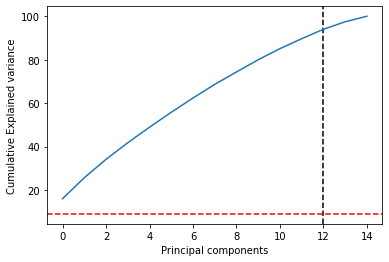

In [130]:
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=9, color="r",  linestyle="--")

plt.plot(var_cumu)
plt.show()

PCA gives new indicators which are linear combinations of the original ones, thus the new indicators combines similar old indicators through their shared properties, you are going to redefine these new indicators according to your understanding of the potential shared properties.

# finding best random_state

In [131]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=12)

# Random Forest:

In [132]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(x_train, y_train)

y_prediction = random_forest.predict(x_test)

random_forest.score(x_train, y_train)
acc_random_forest = round(random_forest.score(x_train, y_train) * 100, 2)

# Logistic Regression:

In [133]:
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)

acc_log = round(logreg.score(x_train, y_train) * 100, 2)

# K Nearest Neighbor:

In [139]:
# KNN
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(x_train, y_train) 

y_pred = knn.predict(x_test) 

acc_knn = round(knn.score(x_train, y_train) * 100, 2)

# Gaussian Naive Bayes:

In [140]:
gaussian = GaussianNB() 
gaussian.fit(x_train, y_train) 

y_pred = gaussian.predict(x_test) 

acc_gaussian = round(gaussian.score(x_train, y_train) * 100, 2)

# Decision Tree

In [142]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(x_train, y_train) 

y_pred = decision_tree.predict(x_test)  

acc_decision_tree = round(decision_tree.score(x_train, y_train) * 100, 2)

# AdaBoostClassifier

In [145]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)

y_pred = ad.predict(x_test)  

acc_ad = round(ad.score(x_train, y_train) * 100, 2)

# GradientBoostingClassifier

In [146]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)

y_pred = gbc.predict(x_test) 

acc_gbc = round(gbc.score(x_train, y_train) * 100, 2)

# Which is the best Model ?

In [171]:
results = pd.DataFrame({
    
    'Model': [ 'KNN','Random Forest',  'Decision Tree','GaussianNB','AdaBoostClassifier',
              'LogisticRegression','GradientBoostingClassifier'],
               
    
    'Score': [acc_random_forest, acc_log, 
             acc_knn,  acc_gaussian,
              acc_decision_tree,acc_ad,acc_gbc]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df

Model
Score                             
100.00                         KNN
100.00          AdaBoostClassifier
87.00   GradientBoostingClassifier
86.18                Decision Tree
86.09           LogisticRegression
79.61                   GaussianNB
78.92                Random Forest

As we can see, the KNN goes on the first place. But first, let us check, how KNN performs, when we use cross validation.

# Cross Validation

Cross-Validation also referred to as out of sampling technique is an essential element of a data science project. It is a resampling procedure used to evaluate machine learning models and access how the model will perform for an independent test dataset.
There is always a need to validate the stability of your machine learning model. 

Cross-validation is primarily used in applied machine learning to estimate the skill of a machine learning model on unseen data. That is, to use a limited sample in order to estimate how the model is expected to perform in general when used to make predictions on data not used during the training of the model.


In [172]:
from sklearn.model_selection import cross_val_score

In [173]:
print(cross_val_score(ad,x,y,cv=5).mean())

0.8588144963144962


In [174]:
print(cross_val_score(decision_tree,x,y,cv=5).mean())

0.8093058968058967


In [175]:
print(cross_val_score(gbc,x,y,cv=5).mean())

0.8640356265356266


In [162]:
print(cross_val_score(gaussian,x,y,cv=5).mean())

0.7952702702702703


In [163]:
print(cross_val_score(knn,x,y,cv=5).mean())

0.7587837837837839


In [164]:
print(cross_val_score(random_forest,x,y,cv=5).mean())

0.8566031941031941


In [166]:
print(cross_val_score(logreg,x,y,cv=5).mean())

0.7925061425061426


I checked the cross validation of each model here. The AdaBoost Classifier has cross validation is 85% and GradientBoostingClassifier
has cross validation is 86%.

# Ada Boost classifier

Boosting is an ensemble modeling technique which attempts to build a strong classifier from the number of weak classifiers. It is done building a model by using weak models in series. Firstly, a model is built from the training data. Then the second model is built which tries to correct the errors present in the first model. This procedure is continued and models are added until either the complete training data set is predicted correctly or the maximum number of models are added.

AdaBoost was the first really successful boosting algorithm developed for the purpose of binary classification. AdaBoost is short for Adaptive Boosting and is a very popular boosting technique which combines multiple “weak classifiers” into a single “strong classifier”. 
It was formulated by Yoav Freund and Robert Schapire. They also won the 2003 Gödel Prize for their work.

AdaBoost algorithm, short for Adaptive Boosting, is a Boosting technique that is used as an Ensemble Method in Machine Learning. It is called Adaptive Boosting as the weights are re-assigned to each instance, with higher weights to incorrectly classified instances.

# Feature Importance

Another great quality of ada boost is that they make it very easy to measure the relative importance of each feature. Sklearn measure a features importance by looking at how much the treee nodes, that use that feature, reduce impurity on average (across all trees in the forest). It computes this score automaticall for each feature after training and scales the results so that the sum of all importances is equal to 1. We will acces this below:

In [176]:
importances = pd.DataFrame({'feature':x_train.columns,'importance':np.round(ad.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

importance
feature                   
Occupation            0.22
Age                   0.14
Capital_gain          0.14
Education_num         0.10
Capital_loss          0.10
Relationship          0.06
Hours_per_week        0.06
Education             0.04
Marital_status        0.04
Sex                   0.04
Workclass             0.02
Fnlwgt                0.02
Race                  0.02
Native_country        0.00

<AxesSubplot:xlabel='feature'>

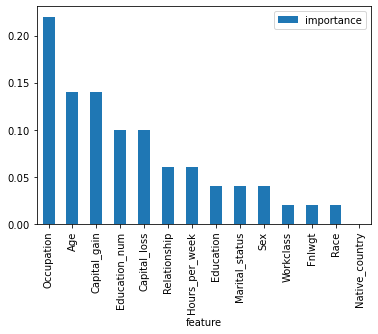

In [168]:
importances.plot.bar()

In this plot, showing how column is more importance in this dataset. Occupation column has more importance in this given plot.

# Training ada boost classifier again:

In [180]:
# ada boost classifier

ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
y_prediction = ad.predict(x_test)

ad.score(x_train, y_train)

acc_ad = round(ad.score(x_train, y_train) * 100, 2)
print(round(acc_ad,2,), "%")

86.09 %


Our ada boost model predicts as good as it did before. A general rule is that, the more features you have, the more likely your model will suffer from overfitting and vice versa. But I think our data looks fine for now and hasn't too much features.

# hyper parameter tuning

In machine learning, a hyperparameter is a parameter whose value is used to control the learning process. By contrast, the values of other parameters (typically node weights) are derived via training.

Hyperparameters can be classified as model hyperparameters, that cannot be inferred while fitting the machine to the training set because they refer to the model selection task, or algorithm hyperparameters, that in principle have no influence on the performance of the model but affect the speed and quality of the learning process. An example of a model hyperparameter is the topology and size of a neural network. Examples of algorithm hyperparameters are learning rate and mini-batch size.

In [181]:
from sklearn.model_selection import GridSearchCV
parameter = {'max_depth' : np.arange(2,10),
              'criterion':['gini','entropy']}

In [182]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)

In [183]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9])})

In [184]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 8}

In [185]:
GCV.best_score_

0.8551913820765529

In [186]:
ada=AdaBoostClassifier()
search_grid={'n_estimators':[500,1000,2000],
             'learning_rate':[.001,0.01,.1]}

In [187]:
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='accuracy',n_jobs=1,cv=5)

In [188]:
search.fit(x,y)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(), n_jobs=1,
             param_grid={'learning_rate': [0.001, 0.01, 0.1],
                         'n_estimators': [500, 1000, 2000]},
             scoring='accuracy')

In [189]:
search.best_params_

{'learning_rate': 0.1, 'n_estimators': 2000}

In [190]:
search.best_score_

0.8654791154791155

In [191]:
rfc=RandomForestClassifier(random_state=42)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']}

In [192]:
CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)

In [193]:
CV_rfc.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [200, 500]})

In [194]:
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 8,
 'max_features': 'auto',
 'n_estimators': 200}

In [195]:
CV_rfc.best_score_

0.8577584231033694

In [196]:
grid_params={ 'n_neighbors':[3,5,11,19],
            'weights': ['uniform','distance'],
            'metric':['éuclidean','manhattan']}

In [197]:
gs=GridSearchCV(knn,grid_params,verbose=1,cv=3,n_jobs=-1)

In [198]:
gs_result=gs.fit(x_train,y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


In [199]:
gs_result.best_score_

0.7995874473982951

In [200]:
gs_result.best_estimator_

KNeighborsClassifier(metric='manhattan', n_neighbors=19)

In [201]:
gs_result.best_params_

{'metric': 'manhattan', 'n_neighbors': 19, 'weights': 'uniform'}

The best score in this detaset is ada boost model.The best score is 86% in this model.

# Further Evaluation

# Confusion Matrix:

In [202]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
predictions = cross_val_predict(ad, x_train, y_train, cv=3)
confusion_matrix(y_train, predictions)

array([[15622,   986],
       [ 2088,  3119]], dtype=int64)

A confusion matrix gives you a lot of information about how well your model does, but theres a way to get even more, like computing the classifiers precision.

# Precision and Recall:

In [203]:
from sklearn.metrics import precision_score, recall_score

print("Precision:", precision_score(y_train, predictions))
print("Recall:",recall_score(y_train, predictions))

Precision: 0.7598051157125457
Recall: 0.5990013443441521


Our model predicts 75% of the time, a  Income in US falls in the income category of either greater than 50K Dollars or less equal to 50K Dollars (precision). 
The recall tells us that it predicted the  person makes over $50K a year.

# F-Score

You can combine precision and recall into one score, which is called the F-score. The F-score is computed with the harmonic mean of precision and recall. Note that it assigns much more weight to low values. As a result of that, the classifier will only get a high F-score, if both recall and precision are high.

In [204]:
from sklearn.metrics import f1_score
f1_score(y_train, predictions)

0.6698883161512028

There we have it, a 67 % F-score. The score is not that high, because we have a recall of 60%. But unfortunately the F-score is not perfect, because it favors classifiers that have a similar precision and recall.
This is a problem, because you sometimes want a high precision and sometimes a high recall. The thing is that an increasing precision, sometimes results in an decreasing recall and vice versa (depending on the threshold). This is called the precision/recall tradeoff. We will discuss this in the following section.

# Precision Recall Curve

We will plot the precision and recall with the threshold using matplotlib:

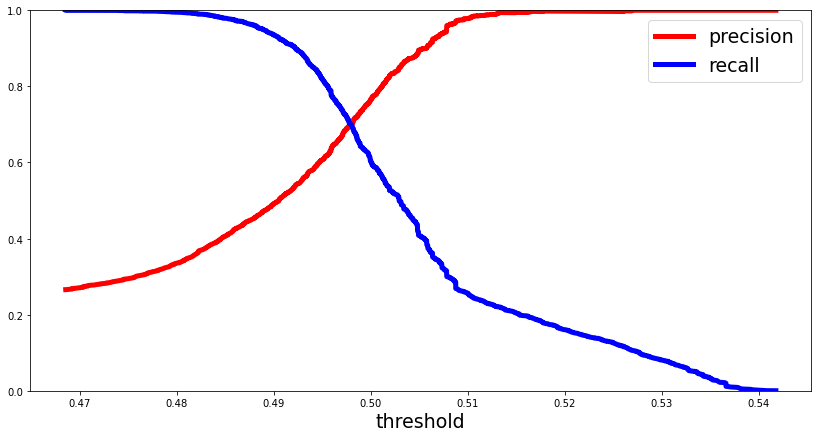

In [205]:
from sklearn.metrics import precision_recall_curve

# getting the probabilities of our predictions
y_scores = ad.predict_proba(x_train)
y_scores = y_scores[:,1]

precision, recall, threshold = precision_recall_curve(y_train, y_scores)
def plot_precision_and_recall(precision, recall, threshold):
    plt.plot(threshold, precision[:-1], "r-", label="precision", linewidth=5)
    plt.plot(threshold, recall[:-1], "b", label="recall", linewidth=5)
    plt.xlabel("threshold", fontsize=19)
    plt.legend(loc="upper right", fontsize=19)
    plt.ylim([0, 1])

plt.figure(figsize=(14, 7))
plot_precision_and_recall(precision, recall, threshold)
plt.show()

You are now able to choose a threshold, that gives you the best precision/recall tradeoff for your current machine learning problem. If you want for example a precision of 80%, you can easily look at the plots and see that you would need a threshold of around 0.4. Then you could train a model with exactly that threshold and would get the desired accuracy.

Another way is to plot the precision and recall against each other:

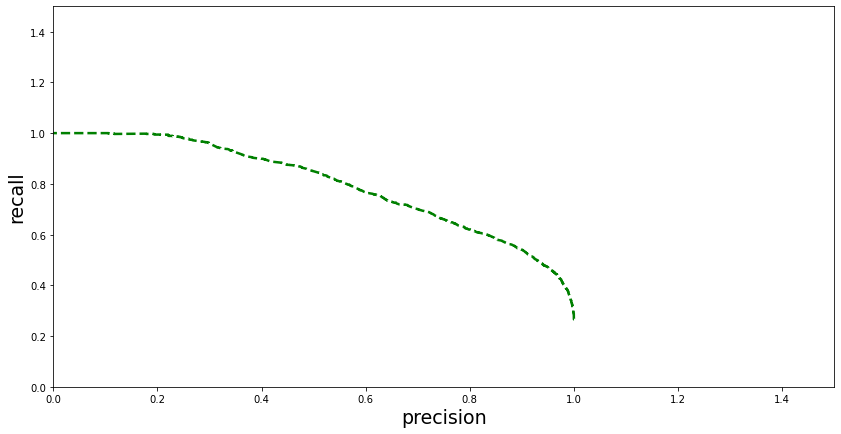

In [206]:
def plot_precision_vs_recall(precision, recall):
    plt.plot(recall, precision, "g--", linewidth=2.5)
    plt.ylabel("recall", fontsize=19)
    plt.xlabel("precision", fontsize=19)
    plt.axis([0, 1.5, 0, 1.5])

plt.figure(figsize=(14, 7))
plot_precision_vs_recall(precision, recall)
plt.show()


# ROC AUC Curve

Another way to evaluate and compare your binary classifier is provided by the ROC AUC Curve. This curve plots the true positive rate (also called recall) against the false positive rate (ratio of incorrectly classified negative instances), instead of plotting the precision versus the recall.

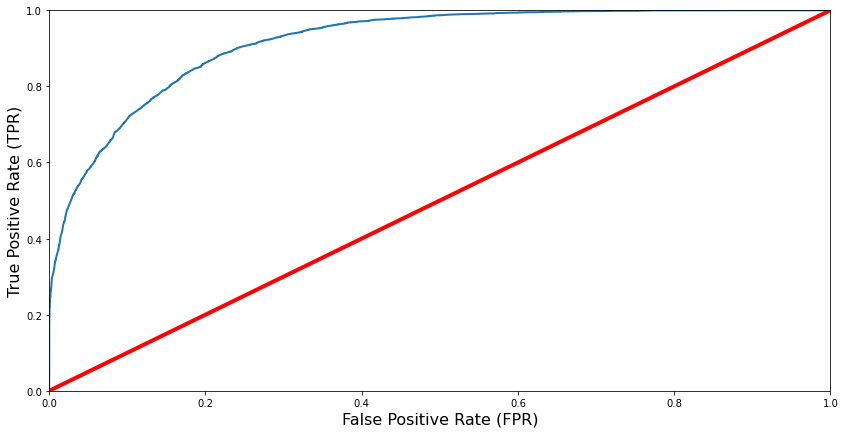

In [208]:
from sklearn.metrics import roc_curve
# compute true positive rate and false positive rate
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_train, y_scores)
# plotting them against each other
def plot_roc_curve(false_positive_rate, true_positive_rate, label=None):
    plt.plot(false_positive_rate, true_positive_rate, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'r', linewidth=4)
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)', fontsize=16)
    plt.ylabel('True Positive Rate (TPR)', fontsize=16)

plt.figure(figsize=(14, 7))
plot_roc_curve(false_positive_rate, true_positive_rate)
plt.show()

The red line in the middel represents a purely ada boost classifier (e.g a coin flip) and therefore your classifier should be as far away from it as possible. Our ada boost classifier model seems to do a good job.

Of course we also have a tradeoff here, because the classifier produces more false positives, the higher the true positive rate is.

# ROC AUC Score

The ROC AUC Score is the corresponding score to the ROC AUC Curve. It is simply computed by measuring the area under the curve, which is called AUC.

In [209]:
from sklearn.metrics import roc_auc_score
r_a_score = roc_auc_score(y_train, y_scores)
print("ROC-AUC-Score:", r_a_score)

ROC-AUC-Score: 0.9169364524948445


# Saving the model

In [224]:
import pickle
filename='Census Income.pkl'
pickle.dump(ad,open(filename,'wb'))

# conclusion

In [225]:
loaded_model=pickle.load(open('Census Income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8577943229409027


In [227]:
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],y_pred[:]],index=["predicted","original"])

In [228]:
conclusion

0      1      2      3      4      5      6      7      8      \
predicted      0      0      0      0      0      0      1      0      0   
original       0      0      0      0      0      0      1      0      0   

           9      ...  10735  10736  10737  10738  10739  10740  10741  10742  \
predicted      0  ...      0      0      0      1      1      0      1      0   
original       0  ...      0      0      0      1      1      0      1      0   

           10743  10744  
predicted      0      0  
original       0      0  

[2 rows x 10745 columns]